<a href="https://colab.research.google.com/github/Cuong2812/Spam-Email-Detection-using-Naive-Bayes/blob/main/spam_mail_prediction_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns

Data Collection & Pre-Processing

In [ ]:
# loading the data from csv file to a pandas Dataframe
mail_data = pd.read_csv('/mail_data.csv')

In [ ]:
print(mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

Label Encoding

In [ ]:
# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

spam  -  0

ham  -  1

In [ ]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [ ]:
print(mail_data['Category'].value_counts())

1    4825
0     747
Name: Category, dtype: int64


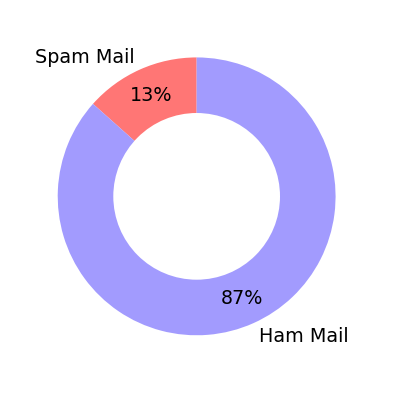

In [ ]:
amount_of_spam = mail_data['Category'].value_counts()[0]
amount_of_ham = mail_data['Category'].value_counts()[1]
category_names = ['Spam Mail', 'Ham Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colors = ['#ff7675','#a29bfe']
plt.figure(figsize=(2,2), dpi = 230)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle = 90, autopct = '%1.0f%%', colors = custom_colors, pctdistance = 0.8)
centre_circle = plt.Circle((0,0), radius = 0.6, fc = 'white')
plt.gca().add_artist(centre_circle)
plt.show()

Splitting the data into training data & test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

Feature Extraction

In [ ]:
# transform the text data to feature vectors that can be used as input
count_vector = CountVectorizer(lowercase='True',min_df= 1, stop_words='english')
X_train_features = count_vector.fit_transform(X_train)
X_test_features = count_vector.transform(X_test)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train_features.shape)

(4457, 7431)


In [ ]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

Training the Model

In [ ]:
# training the Naive Bayes model with the training data
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train_features,Y_train)

MultinomialNB()

Confusion Matrix of Model on Training Data

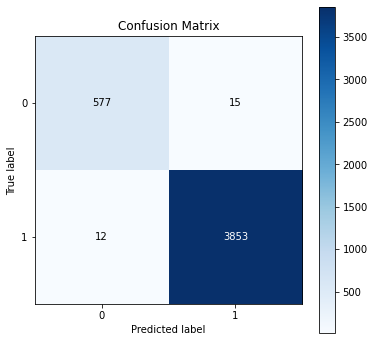

In [ ]:
predict_train = NB_classifier.predict(X_train_features)
skplt.metrics.plot_confusion_matrix(Y_train, predict_train,figsize=(6,6))
plt.show()

Confusion Matrix of Model on Testing Data

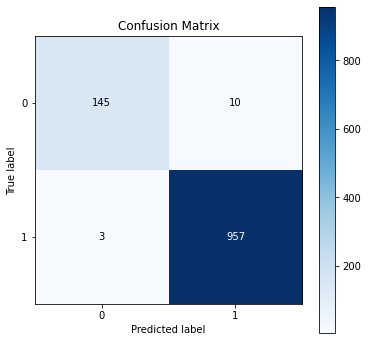

In [ ]:
predict_test = NB_classifier.predict(X_test_features)
skplt.metrics.plot_confusion_matrix(Y_test, predict_test,figsize=(6,6))
plt.show()

Evaluating the trained model

In [ ]:
# prediction on training data

print(classification_report(Y_train, predict_train))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       592
           1       1.00      1.00      1.00      3865

    accuracy                           0.99      4457
   macro avg       0.99      0.99      0.99      4457
weighted avg       0.99      0.99      0.99      4457



In [ ]:
# prediction on test data

print(classification_report(Y_test, predict_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       155
           1       0.99      1.00      0.99       960

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

